# Normal Distribution

### Task: Create a notebook about the normal distribution. Define and explain the main concepts. Pitch the notebook at your classmates. Use visuals like plots to explain concepts.

In [110]:
# importing all of the libraries we will need at the top of the notebook

import math
import matplotlib.pyplot as plt
import numpy as np
import scipy as ss

## Definition

The normal distribution, also known as the Gaussian distribution, is a continuous, symmetrical probability distribution that visually resembles, and is popularly known as, the bell curve.

The exact characteristics of this curve are determined by the <i>mean</i> of the range under investigation (signified by the Greek $\mu$, or mu, symbol) and the <i>standard variation</i> of the same dataset (signified by the $\sigma$, or sigma, symbol). The [Encyclopædia Britannica](https://www.britannica.com/topic/normal-distribution) (2022) elaborates on this concept:

> the mean, or average, which is the maximum of the graph and about which the graph is always symmetric; and the standard deviation, which determines the amount of dispersion away from the mean.

![image](..\materials\normal-pdf-cdf.png)
<sub>Above, from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution) (2022), four different plots of normally-distributed data, with differing values for the mean ($\mu$) and the standard variation ($\sigma$). The plot on the left shows the familiar bell curves using a <i>probability density function</i>, while the plot on the right shows the same data using a <i>cumulative distribution function</i>.</sub>

>>> basically the normal distribution assigns values equally either side of the mean, ensuring that the curve itself is symmetrical, and peaking at the mean.

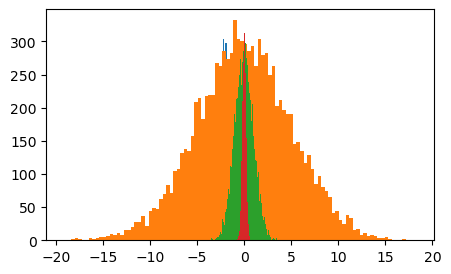

In [89]:
# create a range of 10000 normally-distributed data points, with a mean of 0, and a standard deviation of 1
nor1 = np.random.normal(loc=0,scale=0.2,size=10000)
nor2 = np.random.normal(loc=0,scale=1.0,size=10000)
nor3 = np.random.normal(loc=0,scale=5.0,size=10000)
nor4 = np.random.normal(loc=-2,scale=0.5,size=10000)

# plot the dataset, and segment all the datapoints into 100 bins


plt.hist(nor4, bins=100)
plt.hist(nor3, bins=100)
plt.hist(nor2, bins=100)
plt.hist(nor1, bins=100)

plt.show();

0 0.4472135954999579
0 1.0
0 2.23606797749979
-2 0.7071067811865476


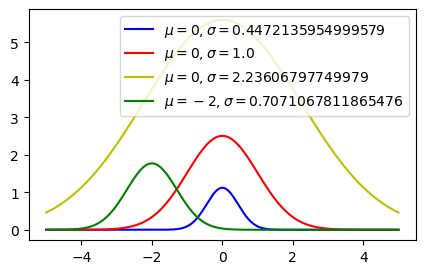

In [144]:
# I've adapted Ian's original plot code here and supplemented it with some ideas from the metadata supplied with
# the Wikipedia image, found at this exact link: https://commons.wikimedia.org/wiki/File:Normal_Distribution_PDF.svg

# x values for plot.
x = np.linspace(-5.0, 5.0, 1000)

mu_sig = ([0,np.sqrt(0.2),'b'],[0,np.sqrt(1),'r'],[0,np.sqrt(5),'y'],[-2,np.sqrt(0.5),'g'])

# Plot the function for several different values of mu and sig
for i in mu_sig:
    mu = i[0]
    sigma = i[1]
    colour = i[2]
    print (mu, sigma)
    # plots points on the y-axis using the density function
    plt.plot(x, (sigma * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sigma**2)), color=colour, label=rf'$\mu = {mu},\sigma = {sigma}$')

# Add a legend.
plt.legend(loc='best');

While the symmetry of the normal distribution is one of it's most striking features, [Frost](https://statisticsbyjim.com/basics/normal-distribution/) (2018) notes that:

> "not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric."
    
Below we see summary plots from each of the Wikipedia articles for these distribution. In all four, the symmetry is present, but with subtle changes to that ensure slight differences with the normal distribution. These are due to differing density functions, and the exact parameters that these density functions require.
    
![image](cls-dist.png)

Indeed, we can create all of these distributions just as easily as we created the normal distribution data, using just a couple of parameters.

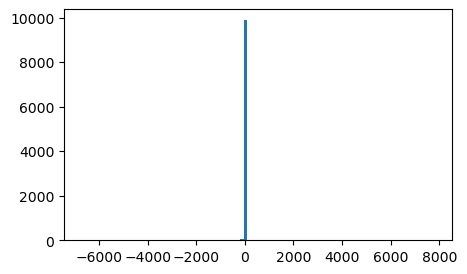

In [56]:

cau = np.random.standard_cauchy(10000)

# would be great to get this working for all four plots

# plot the dataset, and segment all datapoints into 100 bins
plt.hist(cau, bins=100)

plt.show();

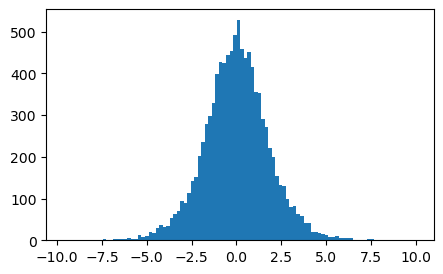

In [66]:
# a dataset distributed logistically. Like the normal distribution, it takes the mean and standard deviation as
# parameters, but the density function produces a slightly different shape.
log = np.random.logistic(loc=0, scale=1, size=10000)

# plot the dataset, and segment all datapoints into 100 bins
plt.hist(log, bins=100)

plt.show();

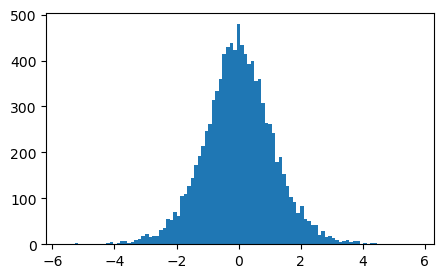

In [58]:
# parameter guide found in the GeeksForGeeks article in the README

# a dataset distributed using Student's t-distribution. Requires two parameters: degrees of freedom and range
stt = np.random.standard_t(df=10, size=10000)

# plot the dataset, and segment all datapoints into 100 bins
plt.hist(stt, bins=100)
plt.show();

## Parameters
- explain mean - Display the operation of the normal distribution but displaying multiple distributions on the same plot, but changing the mean and standard deviation accordingly 
- explain standard deviation

> "The mean, median, and mode are all equal. Half of the population is less than the mean and half is greater than the mean." - Frost, 2018)

In [59]:
# code here

## The normal density function

All distributions are created by a corresponding probability density function, with the normal function being expressed as:

$$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Here we can see the $\mu$ and $\sigma$ symbols identified above as the mean and the standard deviation of the dataset respectively.

In [53]:
# code here

## Building a normal distribution plot in NumPy

- it's probably worth attempting to recreate the examples in the pdf above to take people through the concepts 

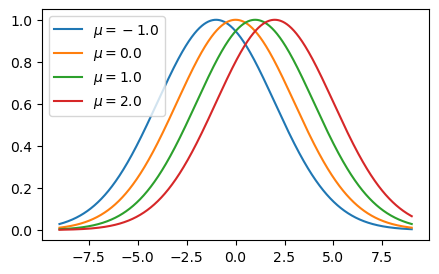

In [133]:
# plot a basic norm dist here, below is Ian's example

# Changing values of mu.
# The mu again represents the mean, this is why in numpy the particular parameter is called the loc, for location

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

## The Central Limit Theorem

https://www.youtube.com/watch?v=YAlJCEDH2uY

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm - there are some good comments at the end of this article around why it is popular, and about how the central limit theorem proves it. This was mentioned in the EncycBrit article.

![image](std-dev.png)

image above from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage)

## Probability and Z-Scores

$$z = \frac{x - \mu}{\sigma}$$

Explanation written from other module notebook (so likely my own work, but still safe to re-word it: "You can shape the random datasets generated with a number of distribution functions. The default distribution so far in this notebook above has been uniform distribution, where items are distributed roughly equally across a dataset. The most familiar other distribution is the bell curve, or normal, distribution.

The normal() function takes in three parameters; the first, `loc`, is the distribution's mean, so in an array `[0,0,1,1]` the mean would be 0.5. The second parameter is `scale` which covers the width or standard deviation of the distribution. The final paramter is `size` and is the same as found earlier in the notebook. For a good graphical explanation of this, click [here](https://en.wikipedia.org/wiki/Normal_distribution#Standard_deviation_and_coverage).

https://www.youtube.com/watch?v=xI9ZHGOSaCg

In [45]:
# step through the process outlined from 2:00 in the video above, display using of LaTeX above

Luckily for us, SciPy contains a built in functions that allow us to work this out pretty quickly.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html - find also a good link for the cdf/pdf functions

Both examples below directly taken from Ian's notebook

In [46]:
# The 50th percentile - the mean in this case
ss.norm().ppf(0.50)

AttributeError: module 'scipy' has no attribute 'norm'

In [ ]:
# The percentile of 0.0 on the x axis.
ss.norm().cdf(0.0)

## Use Cases

"Its familiar bell-shaped curve is ubiquitous in statistical reports, from survey analysis and quality control to resource allocation." - (Augustyn, 2022)

Mention something about ubiquity of normal distribution, and funnily enough, this advert came up while I was researching at https://statisticsbyjim.com/basics/normal-distribution/:

![image](norm-dist-ad.png)

in the above, we can see that 96% of the results fall within two standard deviations of the mean, and 99% falls within three standard deviations, this is true of all normally-distributed data

Male heights: plot these https://www.youtube.com/watch?v=rzFX5NWojp0
baby stddev 0.6, mean 20 inches, adult stddev 4, mean 70 inches, this means that 95% of male heights fall within 8 inches of the average

### Misc notes

Stats by Jim also contains a section called “Population Parameters Versus Sample Estimates”, which is an explanation of the fact that you can’t always know the exact mean or standard deviation, meaning you have to estimate these. From this you can go into a section on Bessel’s correction?